In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from patsy.categorical import C
from patsy.contrasts import Sum
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Keeping Range Constant

## Design

Participants saw two distributions:

* Focal: Normal Distribution SD, $\sigma = 3.1$
* Manipulated: Normal Distribution, $\sigma = 3.1$ or Uniform, $\sigma = 4.6$, same range.

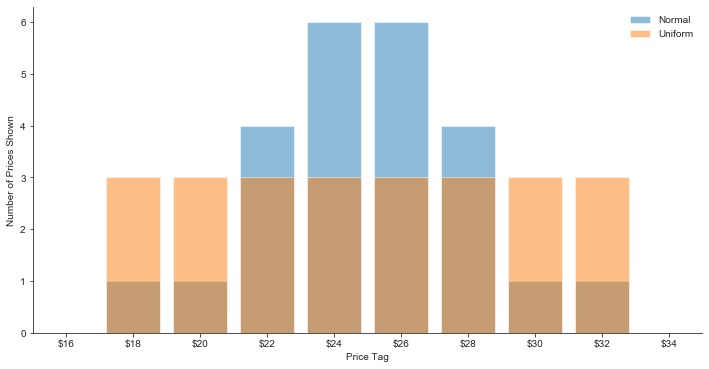

In [2]:
sns.set_style("ticks")
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.hist(dist_normal, bins = np.arange(15, 35, 2), histtype="bar", alpha=0.5, label="Normal", rwidth=.8);
plt.hist(dist_uniform, bins = np.arange(15, 35, 2), histtype="bar", alpha=0.5, label="Uniform", rwidth=.8);
sns.despine()
ax.set_xlabel("Price Tag")
ax.set_ylabel("Number of Prices Shown")
ax.set_xticks(np.arange(16, 36, 2))
ax.set_xticklabels([f"${i}" for i in np.arange(16, 36, 2)]);
ax.set_xlim(15, 35)
plt.legend(frameon=False);

## Analysis

### Descriptive statistics

Number of participants:

In [3]:
df_std = (df_dist
          .groupby(["pid", "turkid", "wine", "is_manipulated", "shape_manipulated", "name_manipulated"])
          .agg({"value":{
              "mean": np.mean, 
              "sd":np.std, 
              "var": lambda x: np.std(x)**2, 
              "range":lambda x: np.max(x) - np.min(x), 
              "min": np.min, 
              "max":np.max,
              "kurtosis": lambda x: kurtosis(x, fisher=False)}})
          .reset_index())
df_std.columns = ['_'.join(col).strip("_") for col in df_std.columns.values]
df_std["legend_manipulated"] = df_std.is_manipulated.map({False: "Common", True:"Manipulated"})
df_std["shape_manipulated"] = df_std.shape_manipulated.map({"Same": "Normal", "Uniform": "Uniform"})
df_std.shape[0]

NameError: name 'df_dist' is not defined

### SD of reported distributions

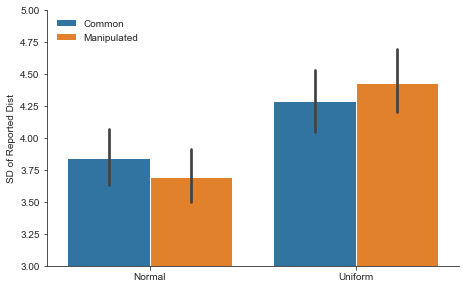

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:            MixedLM Dependent Variable: SD of Reported Distribution
No. Observations: 790     Method:             REML                       
No. Groups:       395     Scale:              0.6644                     
Min. group size:  2       Likelihood:         -1353.7385                 
Max. group size:  2       Converged:          Yes                        
Mean group size:  2.0                                                    
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       3.767    0.111 33.955 0.000  3.549  3.984
Uniform (vs. Normal)            0.594    0.156  3.809 0.000  0.288  0.899
Manipulated (vs. Common)       -0.146    0.083 -1.774 0.076 -0.308  0.015
Interaction                     0.292    0.116  2.520 0.012  0.065  0.520
Participant Random Effects      2.068    0.297                           
=========================================================================

"""

In [73]:
g = sns.catplot(x="shape_manipulated", y="value_sd",data=df_std, hue="legend_manipulated",
                hue_order=['Common', 'Manipulated'], legend=False, kind="bar", aspect=1.5, 
                height=6.38/1.5)
g.set_xlabels("")
g.ax.legend(title="", frameon=False, loc="upper left")
g.ax.set_ylim(3, 5)
g.set_ylabels("SD of Reported Dist")
plt.show()
model = smf.mixedlm("value_sd ~ C(shape_manipulated)\
                    *C(is_manipulated, Diff, levels=[False, True])", 
                    data=df_std, groups=df_std.turkid).fit()
model.summary(xname_fe=['Intercept',
                       'Uniform (vs. Normal)',
                       'Manipulated (vs. Common)',
                       'Interaction'],
             yname="SD of Reported Distribution",
             xname_re=["Participant Random Effects"])

Exposure to another distribution with more weight on the tail inflated people's perception of dispersion.

### Kurtosis of reported distributions

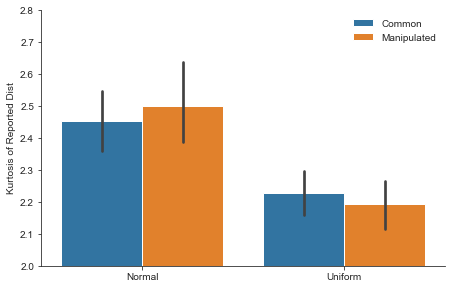

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:            MixedLM Dependent Variable: SD of Reported Distribution
No. Observations: 790     Method:             REML                       
No. Groups:       395     Scale:              0.3055                     
Min. group size:  2       Likelihood:         -798.1751                  
Max. group size:  2       Converged:          Yes                        
Mean group size:  2.0                                                    
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       2.477    0.040 62.249 0.000  2.399  2.555
Uniform (vs. Normal)           -0.267    0.056 -4.769 0.000 -0.376 -0.157
Manipulated (vs. Common)        0.049    0.056  0.867 0.386 -0.061  0.158
Interaction                    -0.085    0.079 -1.086 0.277 -0.240  0.069
Participant Random Effects      0.156    0.056                           
=========================================================================

"""

In [78]:
g = sns.catplot(x="shape_manipulated", y="value_kurtosis",data=df_std, hue="legend_manipulated",
                hue_order=['Common', 'Manipulated'], legend=False, kind="bar", aspect=1.5, 
                height=6.38/1.5)
g.set_xlabels("")
g.ax.legend(title="", frameon=False, loc="upper right")
g.ax.set_ylim(2, 2.8)
g.set_ylabels("Kurtosis of Reported Dist")
plt.show();
model = smf.mixedlm("value_kurtosis ~ C(shape_manipulated)\
                    *C(is_manipulated, Diff, levels=[False, True])", 
                    data=df_std, groups=df_std.turkid).fit()
model.summary(xname_fe=['Intercept',
                       'Uniform (vs. Normal)',
                       'Manipulated (vs. Common)',
                       'Interaction'],
             yname="SD of Reported Distribution",
             xname_re=["Participant Random Effects"])

This effect is driven by a lower kurtosis: People put more weight on the tails of the distributions after learning a uniform (vs. normal) distribution.

### Min of reported distributions

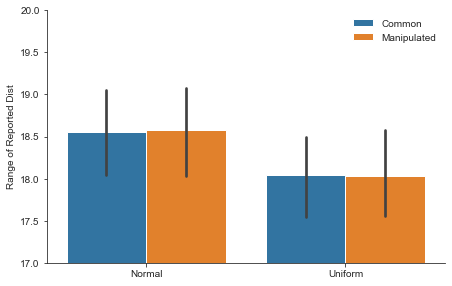

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:            MixedLM Dependent Variable: SD of Reported Distribution
No. Observations: 790     Method:             REML                       
No. Groups:       395     Scale:              4.5343                     
Min. group size:  2       Likelihood:         -2033.4298                 
Max. group size:  2       Converged:          Yes                        
Mean group size:  2.0                                                    
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      18.564    0.239 77.540 0.000 18.095 19.033
Uniform (vs. Normal)           -0.529    0.336 -1.573 0.116 -1.189  0.130
Manipulated (vs. Common)        0.021    0.216  0.095 0.924 -0.402  0.443
Interaction                    -0.031    0.303 -0.101 0.920 -0.625  0.563
Participant Random Effects      8.910    0.530                           
=========================================================================

"""

In [86]:
g = sns.catplot(x="shape_manipulated", y="value_min",data=df_std, hue="legend_manipulated",
                hue_order=['Common', 'Manipulated'], legend=False, kind="bar", aspect=1.5, 
                height=6.38/1.5)
g.set_xlabels("")
g.ax.legend(title="", frameon=False, loc="upper right")
g.ax.set_ylim(17, 20)
g.set_ylabels("Range of Reported Dist")
plt.show();
model = smf.mixedlm("value_min ~ C(shape_manipulated)\
                    *C(is_manipulated, Diff, levels=[False, True])", 
                    data=df_std, groups=df_std.turkid).fit()
model.summary(xname_fe=['Intercept',
                       'Uniform (vs. Normal)',
                       'Manipulated (vs. Common)',
                       'Interaction'],
             yname="SD of Reported Distribution",
             xname_re=["Participant Random Effects"])

In contrast, we do not observe a similar effect on the minimum price reported.

In [9]:
for stats in ["sd", "var", "range", "min", "max"]:
    print(smf.mixedlm(f"value_{stats} ~ C(shape_manipulated)*C(is_manipulated)", data=df_std, groups=df_std.pid).fit().summary())

                               Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               value_sd  
No. Observations:                 790                   Method:                           REML      
No. Groups:                       395                   Scale:                            0.6644    
Min. group size:                  2                     Likelihood:                       -1353.7385
Max. group size:                  2                     Converged:                        Yes       
Mean group size:                  2.0                                                               
----------------------------------------------------------------------------------------------------
                                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------------
Intercept             

In [148]:
model_std = smf.mixedlm("is_phantom_sum ~ C(is_manipulated)*C(shape_manipulated)", data=df_std, groups=df_std.pid).fit()
model_std.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
====================================================================================================
Model:                          MixedLM              Dependent Variable:              is_phantom_sum
No. Observations:               790                  Method:                          REML          
No. Groups:                     395                  Scale:                           3.1049        
Min. group size:                2                    Likelihood:                      -2009.0002    
Max. group size:                2                    Converged:                       Yes           
Mean group size:                2.0                                                                 
----------------------------------------------------------------------------------------------------
                                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------------
Intercept                                                  1.554    0.286  5.430 0.000  0.993  2.115
C(is_manipulated)[T.True]                                  0.128    0.178  0.718 0.472 -0.222  0.478
C(shape_manipulated)[T.Uniform]                            0.431    0.402  1.072 0.284 -0.357  1.219
C(is_manipulated)[T.True]:C(shape_manipulated)[T.Uniform] -0.258    0.251 -1.030 0.303 -0.750  0.233
Group Var                                                 12.862    0.825                           
====================================================================================================

"""

The reported standard deviation is significantly influenced by the shape of the manipulated distribution, and participants perceive a distinction between the two distributions.

### Range of reported distributions

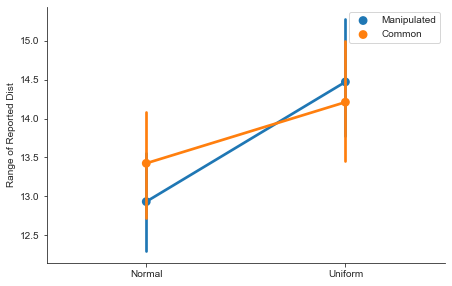

In [7]:
df_range = df_dist.groupby(["pid", "turkid", "wine", "WineManipulated", "DistLabel", "ManipShape"]).value.apply(
    lambda x: np.max(x) - np.min(x)
).reset_index()
g = sns.catplot(x="ManipShape", y="value",data=df_range, hue="DistLabel",
                legend=False, kind="point", aspect=1.5, height=6.38/1.5, legend_out=False, estimator=np.mean)
g.set_xlabels("")
g.add_legend(title="")
g.set_ylabels("Range of Reported Dist");

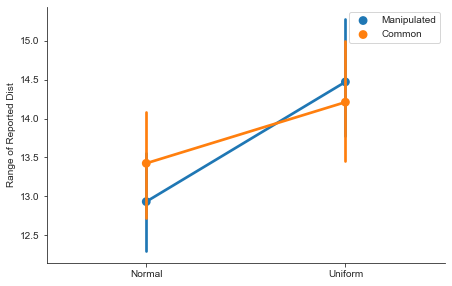

In [7]:
df_range = df_dist.groupby(["pid", "turkid", "wine", "WineManipulated", "DistLabel", "ManipShape"]).value.apply(
    lambda x: np.max(x) - np.min(x)
).reset_index()
g = sns.catplot(x="ManipShape", y="value",data=df_range, hue="DistLabel",
                legend=False, kind="point", aspect=1.5, height=6.38/1.5, legend_out=False, estimator=np.mean)
g.set_xlabels("")
g.add_legend(title="")
g.set_ylabels("Range of Reported Dist");

In [9]:
model_range = smf.mixedlm("value ~ C(ManipShape)*C(DistLabel)", data=df_range, groups=df_range.pid).fit()
model_range.summary()#yname="Range", xname_fe=["Intercept", "Shape: Uniform", "Target: Manipulated", "Interaction"])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                         MixedLM              Dependent Variable:              value     
No. Observations:              790                  Method:                          REML      
No. Groups:                    395                  Scale:                           6.4978    
Min. group size:               2                    Likelihood:                      -2253.8213
Max. group size:               2                    Converged:                       Yes       
Mean group size:               2.0                                                             
-----------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                            13.426    0.373 35.953 0.000 12.694 14.158
C(ManipShape)[T.Uniform]                              0.784    0.525  1.495 0.135 -0.244  1.813
C(DistLabel)[T.Manipulated]                          -0.492    0.258 -1.907 0.057 -0.998  0.014
C(ManipShape)[T.Uniform]:C(DistLabel)[T.Manipulated]  0.752    0.363  2.074 0.038  0.041  1.463
Group Var                                            20.694    0.948                           
===============================================================================================

"""

The reported range is significantly influenced by the shape of the manipulated distribution, and participants perceive a distinction between the two distributions. This speaks to the idea that the perceived dispersion of the distribution is not uniquely influence by the bounds of the distribution.

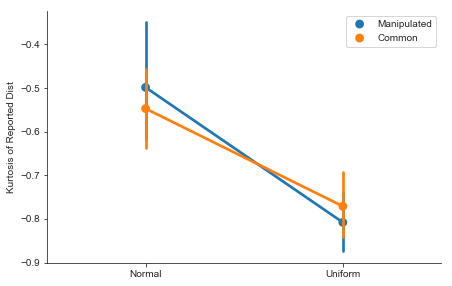

In [112]:
df_kurt = df_dist.groupby(["pid", "turkid", "wine", "WineManipulated", "DistLabel", "ManipShape"]).value.apply(
    lambda x: kurtosis(x)
).reset_index()
g = sns.catplot(x="ManipShape", y="value",data=df_kurt, hue="DistLabel",
                legend=False, kind="point", aspect=1.5, height=6.38/1.5, legend_out=False, estimator=np.mean)
g.set_xlabels("")
g.add_legend(title="")
g.set_ylabels("Kurtosis of Reported Dist");

In [113]:
model_kurt = smf.mixedlm("value ~ C(ManipShape)*C(DistLabel)", data=df_kurt, groups=df_kurt.pid).fit()
model_kurt.summary(yname="Kurtosis", xname_fe=["Intercept", "Shape: Uniform", "Target: Manipulated", "Interaction"])

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM   Dependent Variable:   Kurtosis 
No. Observations:     790       Method:               REML     
No. Groups:           395       Scale:                0.3055   
Min. group size:      2         Likelihood:           -798.1751
Max. group size:      2         Converged:            Yes      
Mean group size:      2.0                                      
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept           -0.547    0.049 -11.244 0.000 -0.642 -0.452
Shape: Uniform      -0.224    0.068  -3.276 0.001 -0.358 -0.090
Target: Manipulated  0.049    0.056   0.867 0.386 -0.061  0.158
Interaction         -0.085    0.079  -1.086 0.277 -0.240  0.069
Group Var            0.156    0.056                            
===============================================================

"""

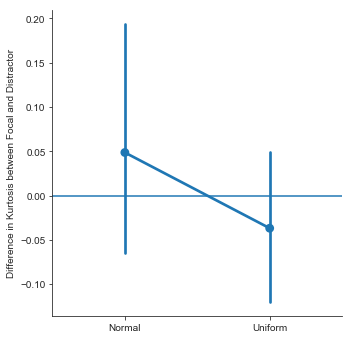

In [114]:
df_diff = df_kurt.groupby(["pid", "ManipShape", "WineManipulated"]).apply(
    lambda x: x[x.DistLabel == "Manipulated"].value.iloc[0] - x[x.DistLabel == "Common"].value.iloc[0]
).reset_index()
df_diff.columns = ["pid", "ManipShape", "WineManipulated", "diff"]
g = sns.catplot(data=df_diff, x="ManipShape", y="diff", order=["Normal", "Uniform"], kind="point", estimator=np.mean)
g.set_ylabels("Difference in Kurtosis between Focal and Distractor")
g.set_xlabels("");
g.ax.axhline(0);

In [115]:
smf.ols("diff ~ C(ManipShape)-1", data=df_diff).fit().summary(yname="Difference in Kurtosis", xname=["Normal", "Uniform"])

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Difference in Kurtosis   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.180
Date:                    Fri, 09 Aug 2019   Prob (F-statistic):              0.278
Time:                            23:32:32   Log-Likelihood:                -462.20
No. Observations:                     395   AIC:                             928.4
Df Residuals:                         393   BIC:                             936.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Normal         0.0486      0.056      0.867      0.386      -0.061       0.159
Uniform       -0.0369      0.055     -0.667      0.505      -0.146       0.072
==============================================================================
Omnibus:                      399.482   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39806.357
Skew:                           3.964   Prob(JB):                         0.00
Kurtosis:                      51.536   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The reported kurtosis is significantly influenced by the shape of the manipulated distribution, but participants do not perceive any difference in kurtosis between the two distributions.